PROOF : As the value of moire pattern increases or we can the complexity of morie pattern increases the model will more misclassify

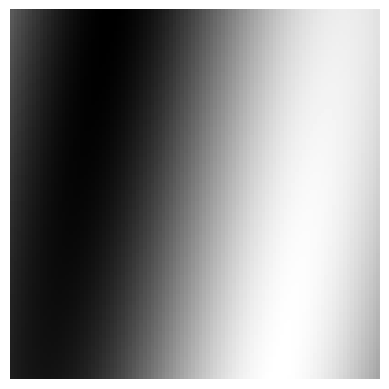

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Define two sine waves with slightly different frequencies and phases
w1 = np.sin(0.9*np.pi*x + 0.1*np.pi*y)
w2 = np.sin(0.6*np.pi*x + 0.2*np.pi*y)

# Combine the two waves to create a moiré pattern
moire = w1 + w2

# Display the pattern using Matplotlib
plt.imshow(moire, cmap='gray')
plt.axis('off')
plt.show()


In [6]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to fit the CNN input
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the original images
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Define a moiré pattern generator
def generate_moire_pattern(img, freq=10, phase=2.5, amp=0.2):
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    moire_pattern = amp * np.sin(freq*np.pi*x + phase*np.pi*y)
    return img + moire_pattern[..., np.newaxis]

# Apply moiré pattern to the test images
test_images_moire = np.array([generate_moire_pattern(img) for img in test_images])

# Evaluate the model on the test images with moiré patterns
test_loss_moire, test_acc_moire = model.evaluate(test_images_moire, test_labels)

# Evaluate the model on the original test images
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy (original images): {test_acc}')
print(f'Test accuracy (images with moiré patterns): {test_acc_moire}')


Epoch 1/5
938/938 [==============================] - 65s 68ms/step - loss: 0.1749 - accuracy: 0.9450 - val_loss: 0.0440 - val_accuracy: 0.9850
Epoch 2/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0481 - val_accuracy: 0.9859
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 0.0343 - accuracy: 0.9907
Test accuracy (original images): 0.9907000064849854
Test accuracy (images with moiré patterns): 0.9671000242233276


In [18]:
from PIL import Image, ImageDraw
import math
# Set the size of the pattern
width, height = 400, 400

# Create a new image and draw a white background
image = Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Set the frequency and amplitude of the pattern
frequency = 10
amplitude = 10

# Draw the moiré pattern
for y in range(height):
    for x in range(width):
        pixel = int(255 * (1 + amplitude * (x * y) / (width * height) * 
                          math.sin(frequency * x))) % 255
        draw.point((x, y), (pixel, pixel, pixel))

# Save the image as a PNG file
image.save("moire_pattern.png")


In [19]:
import numpy as np
from PIL import Image, ImageDraw
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load the MNIST dataset and reshape the images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

# One-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Set the size of the moiré pattern
width, height = 28, 28

# Create a new image and draw the moiré pattern
moire = Image.new("L", (width, height))
draw = ImageDraw.Draw(moire)

# Set the frequency and amplitude of the pattern
frequency = 10
amplitude = 10

# Draw the moiré pattern
for y in range(height):
    for x in range(width):
        pixel = int(255 * (1 + amplitude * (x * y) / (width * height) * 
                          np.sin(frequency * x))) % 255
        draw.point((x, y), pixel)

# Convert the moiré pattern to a numpy array
moire = np.array(moire)

# Apply the moiré pattern to the test images
X_test_moire = np.clip(X_test + moire.reshape(1, 28, 28, 1), 0, 255)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the original images
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the original images
_, acc_original = model.evaluate(X_test, y_test)
print(f"Accuracy on original test images: {acc_original*100:.2f}%")

# Evaluate the model on the moiré images
_, acc_moire = model.evaluate(X_test_moire, y_test)
print(f"Accuracy on moiré test images: {acc_moire*100:.2f}%")


Epoch 1/5
938/938 [==============================] - 102s 65ms/step - loss: 0.6130 - accuracy: 0.8504 - val_loss: 0.0781 - val_accuracy: 0.9786
Epoch 2/5
938/938 [==============================] - 60s 64ms/step - loss: 0.1553 - accuracy: 0.9568 - val_loss: 0.0580 - val_accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.1084 - accuracy: 0.9699 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0887 - accuracy: 0.9746 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0414 - accuracy: 0.9881
Accuracy on original test images: 98.81%
313/313 [==============================] - 4s 12ms/step - loss: 2.6541 - accuracy: 0.0949
Accuracy on moiré test images: 9.49%


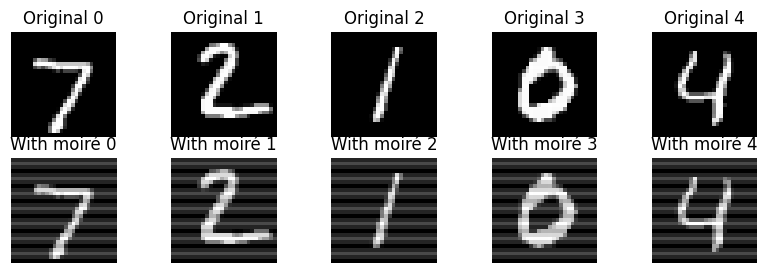

In [20]:
example_indices = [0, 1, 2, 3, 4]
example_images = test_images[example_indices]
example_images_moire = np.array([generate_moire_pattern(img) for img in example_images])

# Display some example images with and without moiré patterns
fig, axs = plt.subplots(2, len(example_indices), figsize=(10, 3))
for i in range(len(example_indices)):
    axs[0, i].imshow(example_images[i, :, :, 0], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {example_indices[i]}')
    axs[1, i].imshow(example_images_moire[i, :, :, 0], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'With moiré {example_indices[i]}')
plt.show()